# Preprocessing
## TODO:
* Retrieve .wav files
* Convert to Mel
* Create Mel Spectrogram


## Imports

In [49]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
from pathlib import Path
import numpy as np
import csv
import re

In [50]:
def get_filenames(path_to_dir: Path):
    filenames = [file.name for file in path_to_dir.iterdir() if file.is_file()]
    return filenames

In [51]:
def filename_to_label_name(file_names: list[str]):
    # 1-137-A-32.wav
    # 1 --> Fold
    # 137 --> Source file
    # 32 --> Label
    # A --> Take

    # Can be edited to include the all
    label_list = []

    for filename in file_names:
        filename = filename.replace(".wav", "")
        fold, name, take, label = re.split(r"[-]", filename)

        label_list.append(int(label))

    return label_list

In [52]:
path_to_wav = Path.cwd() / ".." / "data" / "audio"

audio_filenames = get_filenames(path_to_wav)
labels = filename_to_label_name(audio_filenames)

In [42]:
spectrograms = [] # [label, y1, sr1], [label, y2, sr2], ...]
max_amp = 0
min_amp = 0

for idx, audio_filename in enumerate(audio_filenames):
    audio_file = Path(path_to_wav / audio_filename)
    y, sr = librosa.load(audio_file)
    audio_label = labels[idx]
    spectrogram = audio_label, y, sr
    spectrograms.append(spectrogram)

    max_y = max(y)
    min_y = min(y)

    max_amp = max_y if max_y > max_amp else max_amp
    min_amp = min_y if min_y < min_amp else min_amp

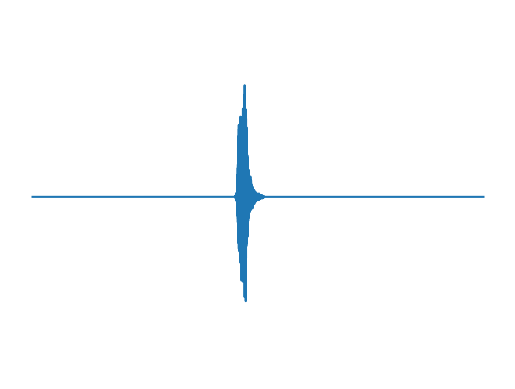

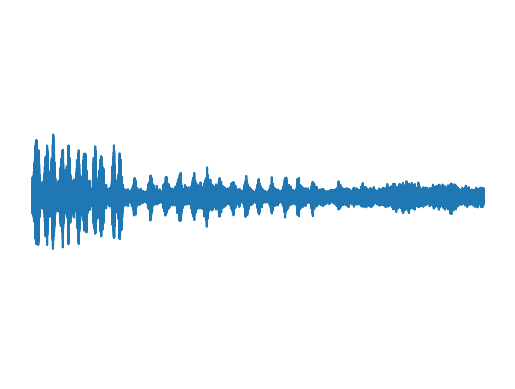

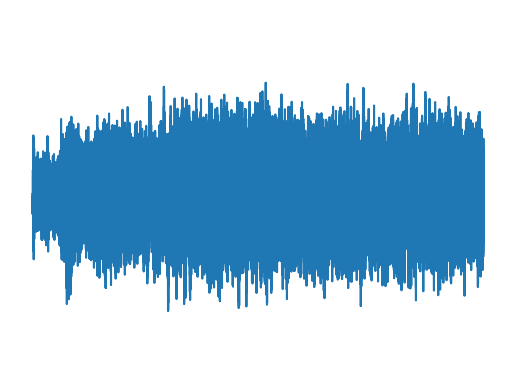

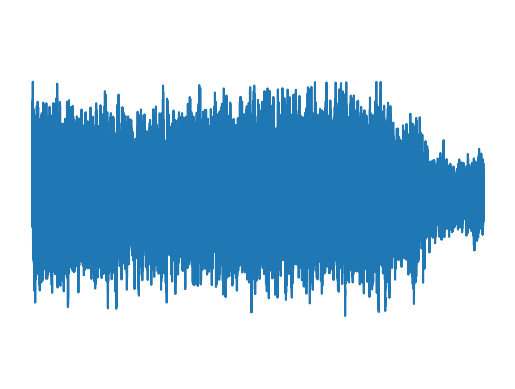

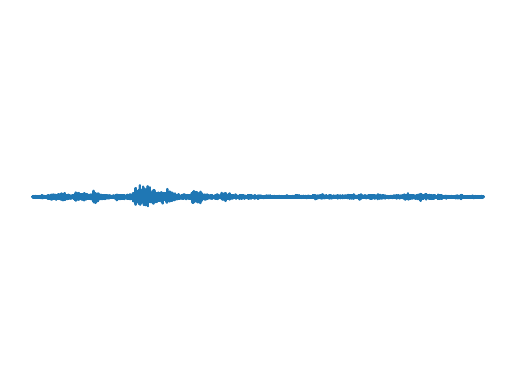

In [48]:
counter = 0
for spectrogram in spectrograms:
    counter += 1
    if counter > 5:
        break

    plt.plot(spectrogram[1])
    plt.ylim([min_amp, max_amp])
    #plt.title('Signal')
    #plt.xlabel('Time (samples)')
    #plt.ylabel('Amplitude')
    plt.axis("off")
    plt.show()